<a href="https://colab.research.google.com/github/ohazem1/Data-Science-Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description  

This Project includes creating a sentiment classifier for IMDB movie reviews.

By: Omar Hazem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re

import nltk
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup


%matplotlib inline
try:
    df = pd.read_csv('../data/imdb_movie_reviews.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/imdb_movie_reviews_subset.csv')
df.head()

,review,sentiment
0,John Cassavetes is on the run from the law. He...,positive
1,It's not just that the movie is lame. It's mor...,negative
2,"Well, if it weren't for Ethel Waters and a 7-y...",negative
3,I find Alan Jacobs review very accurate concer...,positive
4,This movie is simply awesome. It is so hilario...,positive


# Data Exploration 

In [2]:
df.head()

,review,sentiment
0,John Cassavetes is on the run from the law. He...,positive
1,It's not just that the movie is lame. It's mor...,negative
2,"Well, if it weren't for Ethel Waters and a 7-y...",negative
3,I find Alan Jacobs review very accurate concer...,positive
4,This movie is simply awesome. It is so hilario...,positive


In [3]:
df.tail()

,review,sentiment
9995,How did such a terrible script manage to attra...,negative
9996,I was invited to view this film at a small art...,negative
9997,"First of all,there is a detective story:""légit...",positive
9998,This movie grabbed me with the incredible open...,positive
9999,I saw this film at SXSW with the director in a...,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.describe()

,review,sentiment
count,10000,10000
unique,9982,2
top,Smallville episode Justice is the best episode...,negative
freq,2,5035


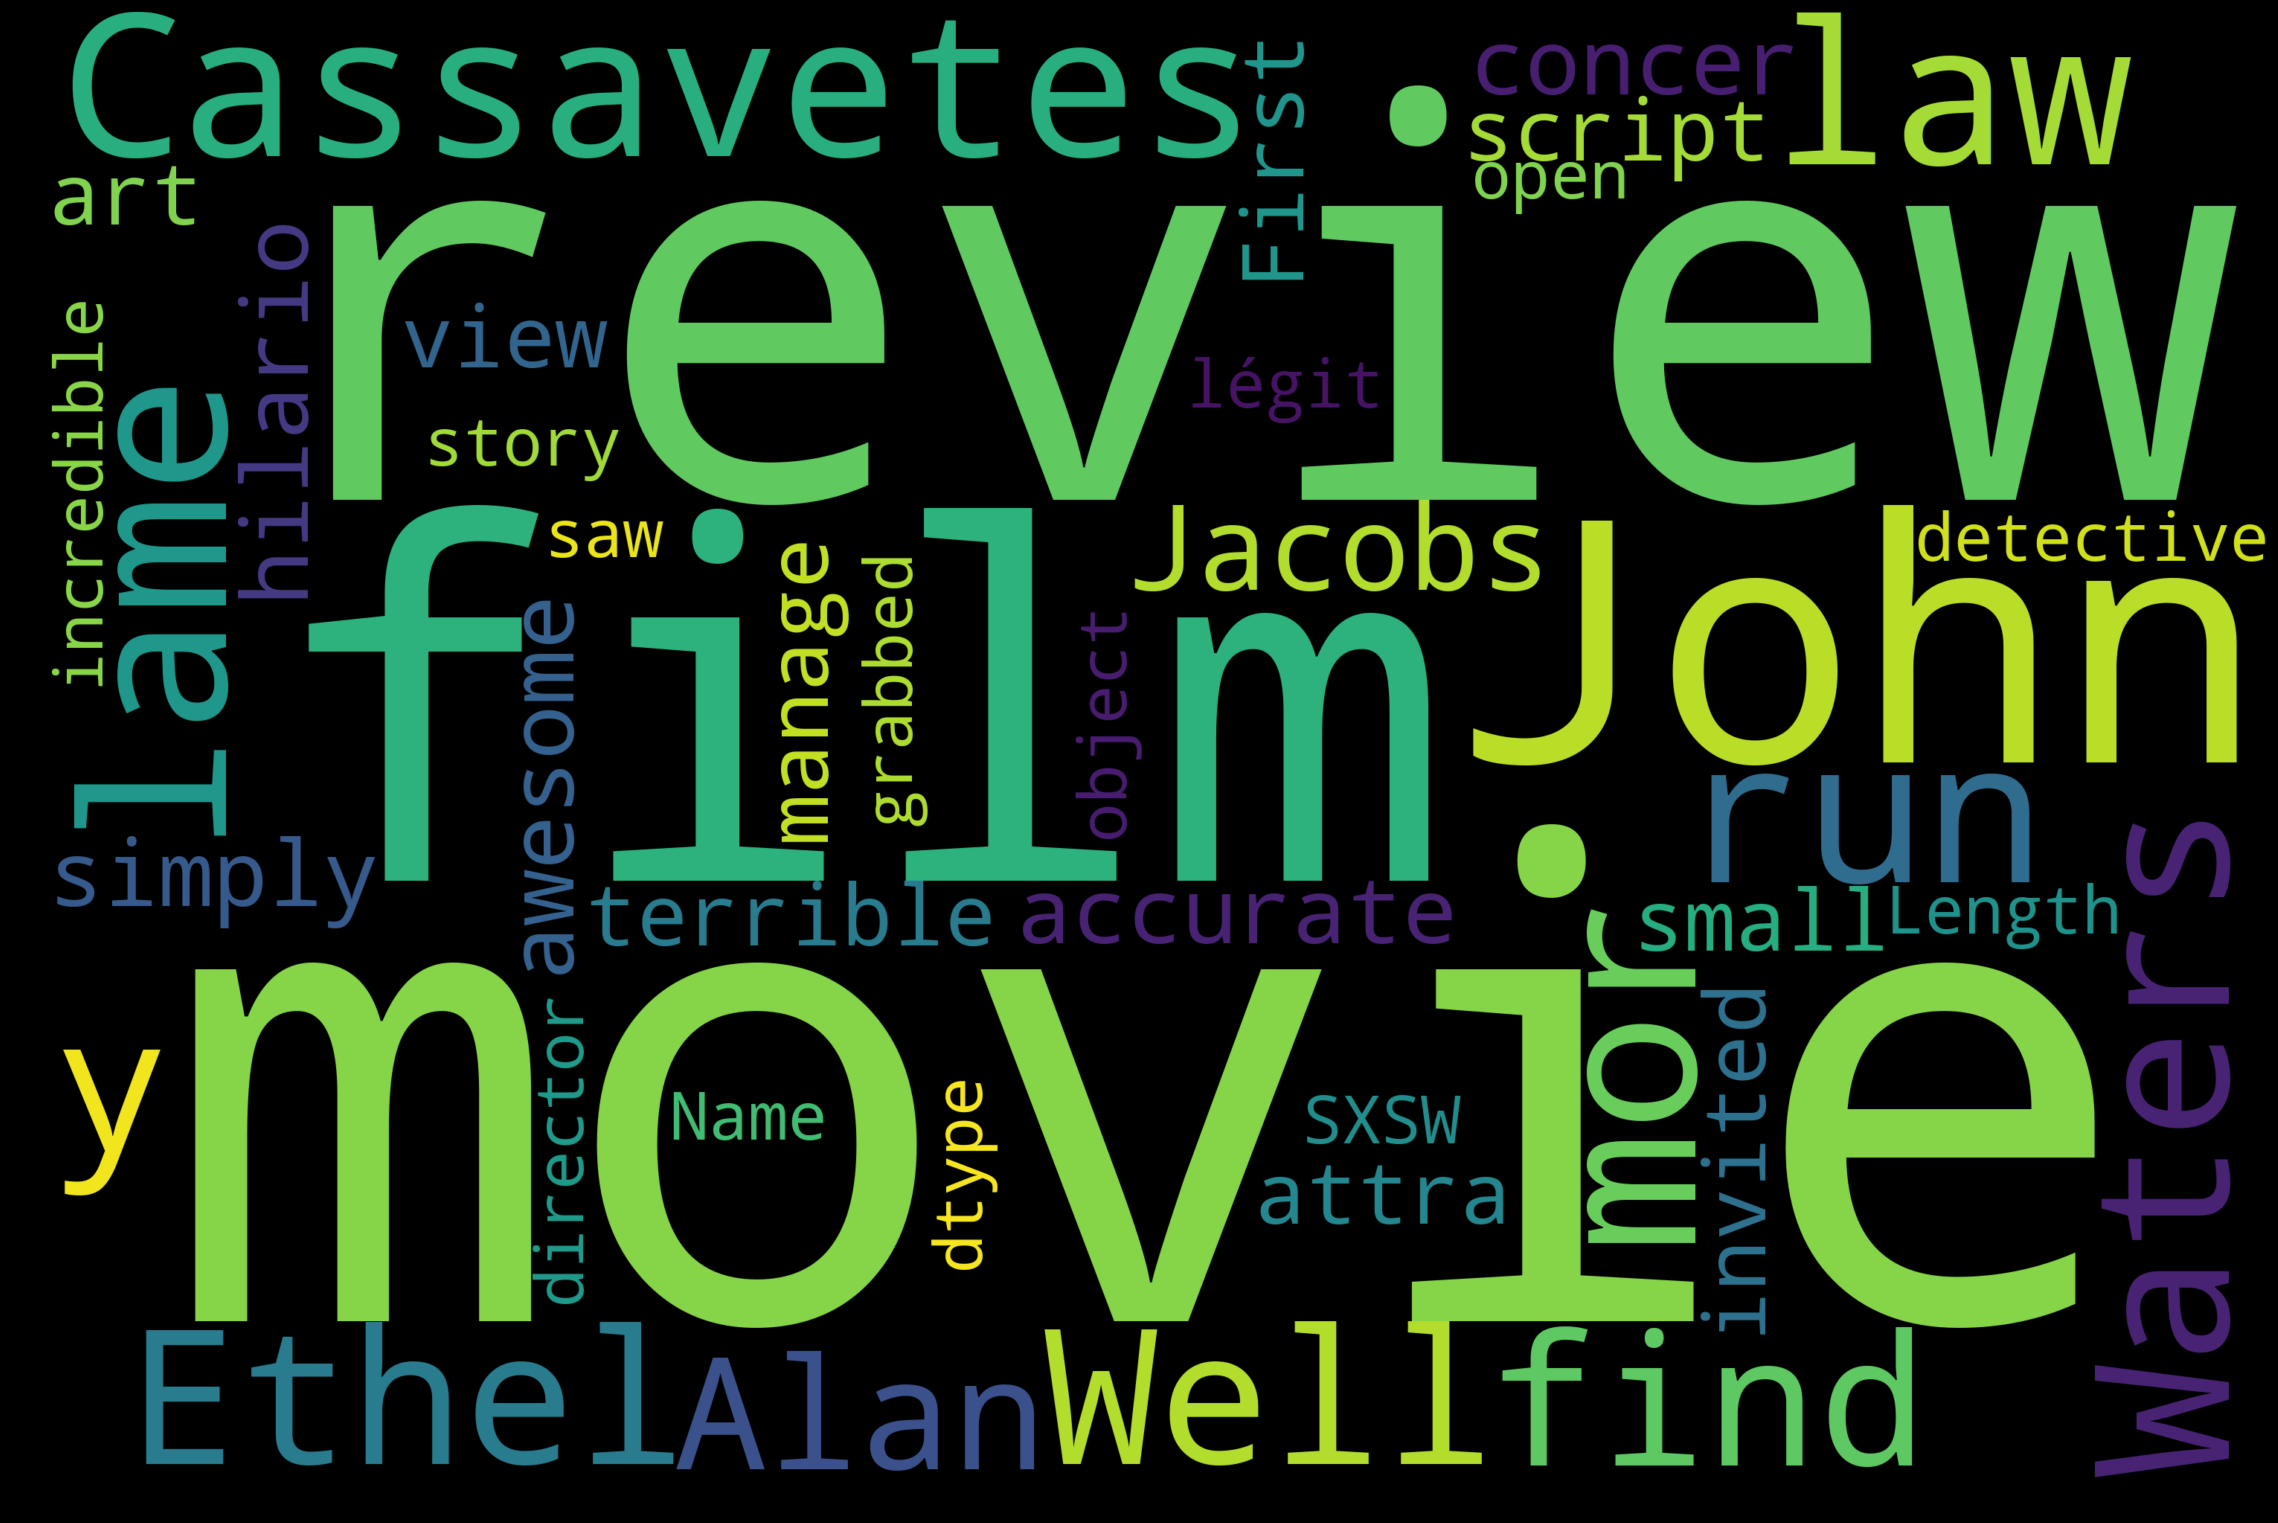

In [9]:
# !pip install wordcloud
# import wordcloud as wc

text = df["review"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

# Data Cleaning & Preprocessing 